In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.core.Hypersimplex import VERTEX, ALPHA, BETA, PROPERTY, UNION_ALPHA, IMMUTABLE_ALPHA, SEQUENCE, hstype_to_str
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn

from IPython.display import Image, display

from graphviz import nohtml

import graphviz
import pprint as pp
import re
import textwrap
import iplantuml

pictures_dir = "pictures/TheCo/"
parser = load_parser()

2 2


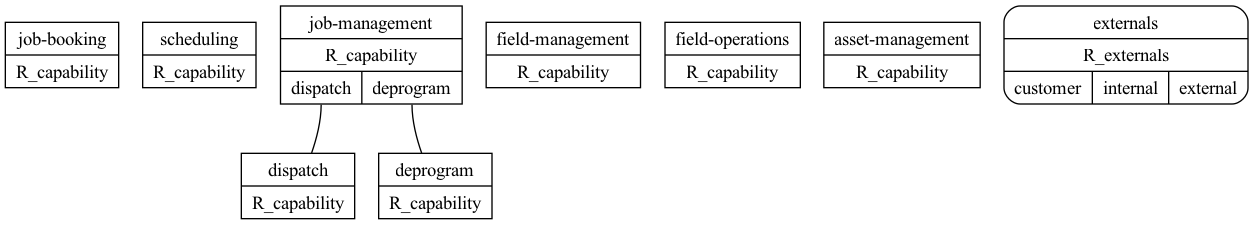

In [2]:
capabilities_hn = Hypernetwork()

compile_hn(capabilities_hn, parser, """
    job-booking=<; R_capability>
    scheduling=<; R_capability>
    job-management=<dispatch, deprogram; R_capability>
        dispatch=<; R_capability>
        deprogram=<; R_capability>
        
    field-management=<; R_capability>
    field-operations=<; R_capability>
    asset-management=<; R_capability>

    externals={customer, internal, external; R_externals}
""")

print(capabilities_hn.hypernetwork["deprogram"].hstype, ALPHA)

draw_hn(capabilities_hn, fname=pictures_dir+"capabilities-hn", view=False, show_hstype=False, show_vertex=False)
Image(filename=pictures_dir+"capabilities-hn.png", width=1000, height=1200)

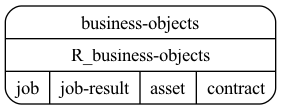

In [3]:
business_objects_hn = Hypernetwork()

compile_hn(business_objects_hn, parser, """
    business-objects={job, job-result, asset, contract; R_business-objects}
""")

draw_hn(business_objects_hn, fname=pictures_dir+"business-objects-hn", view=False, show_hstype=False, show_vertex=False)
Image(filename=pictures_dir+"business-objects-hn.png", width=200, height=1200)

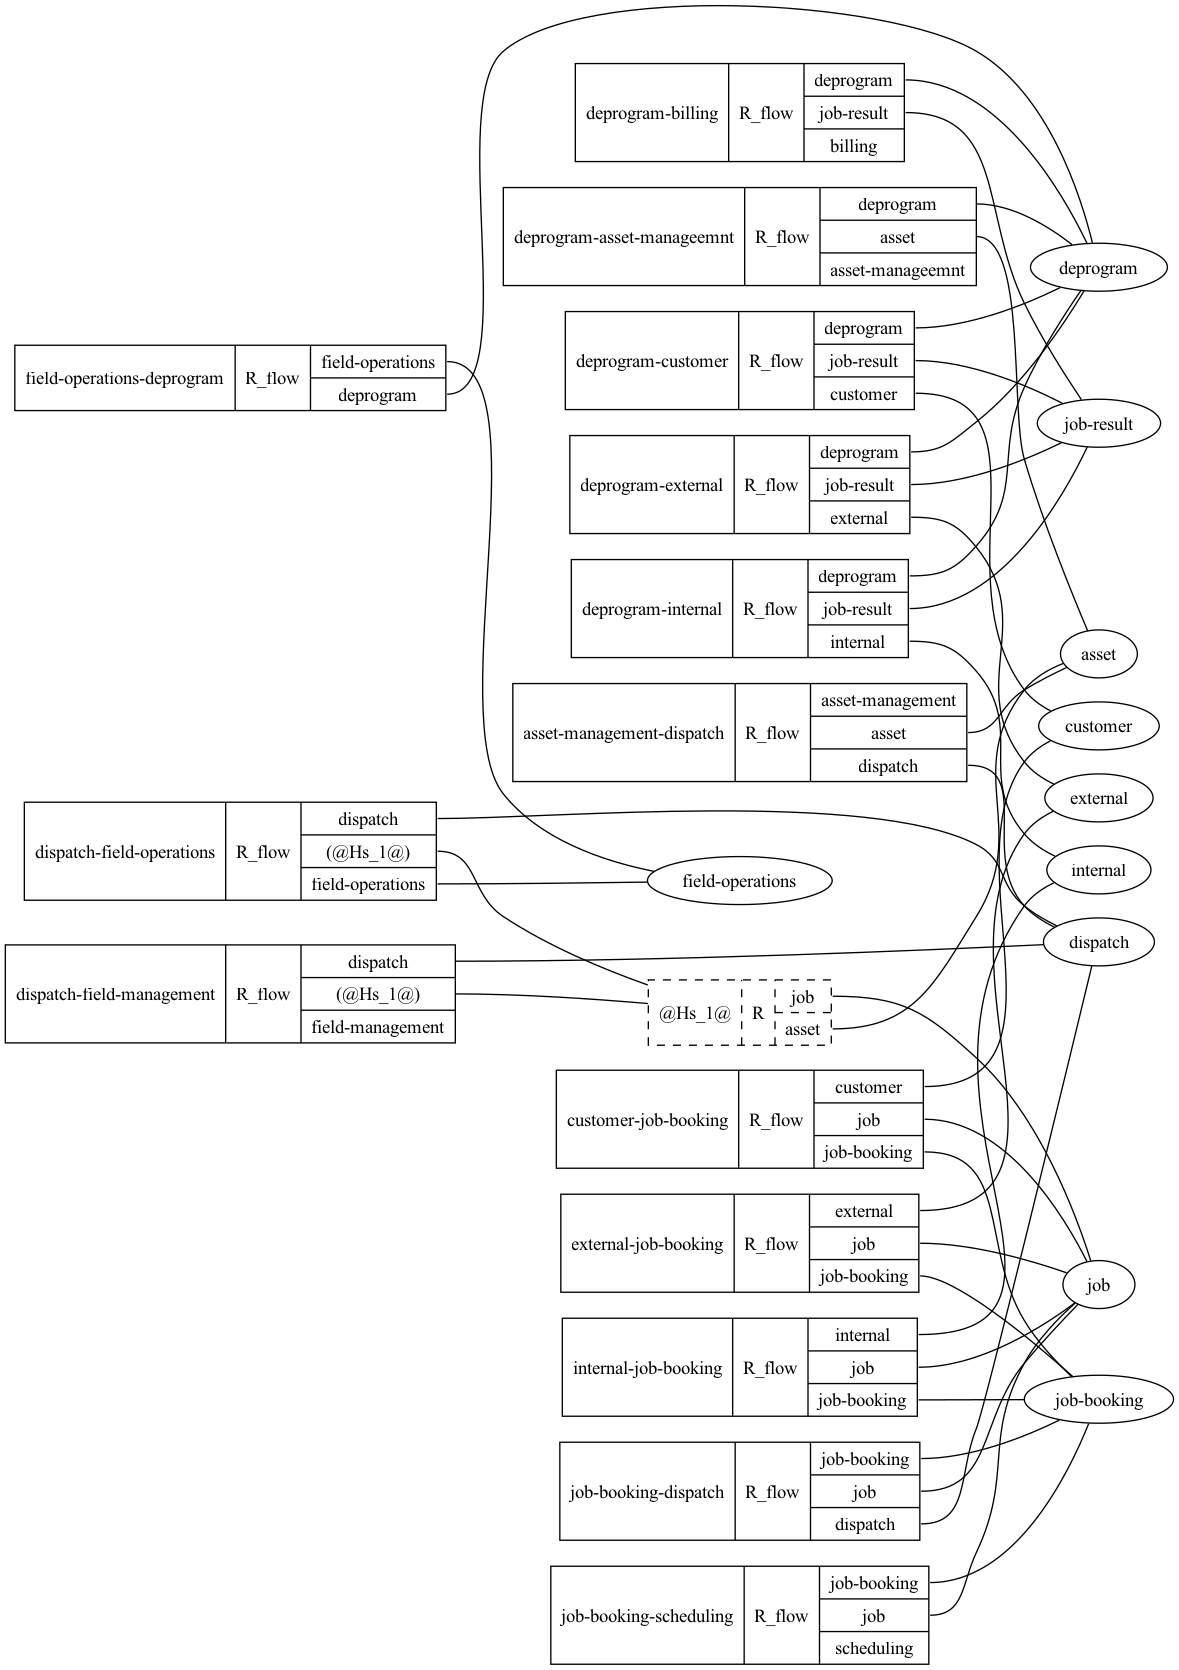

In [4]:
capability_flow_hn = Hypernetwork()

compile_hn(capability_flow_hn, parser, """
    customer-job-booking=<customer, job, job-booking; R_flow>
    internal-job-booking=<internal, job, job-booking; R_flow>
    external-job-booking=<external, job, job-booking; R_flow>

    job-booking-scheduling=<job-booking, job, scheduling; R_flow>
    job-booking-dispatch=<job-booking, job, dispatch; R_flow>

    asset-management-dispatch=<asset-management, asset, dispatch; R_flow>
    dispatch-field-management=<dispatch, (job, asset), field-management; R_flow>
    dispatch-field-operations=<dispatch, (job, asset), field-operations; R_flow>

    field-operations-deprogram=<field-operations, deprogram; R_flow>

    deprogram-billing=<deprogram, job-result, billing; R_flow>
    deprogram-asset-manageemnt=<deprogram, asset, asset-manageemnt; R_flow>
    deprogram-customer=<deprogram, job-result, customer; R_flow>
    deprogram-external=<deprogram, job-result, external; R_flow>
    deprogram-internal=<deprogram, job-result, internal; R_flow>
""")

draw_hn(capability_flow_hn, fname=pictures_dir+"capability-flow-hn", view=False, show_hstype=False, show_vertex=False, direction="LR")
Image(filename=pictures_dir+"capability-flow-hn.png", width=1000, height=1200)

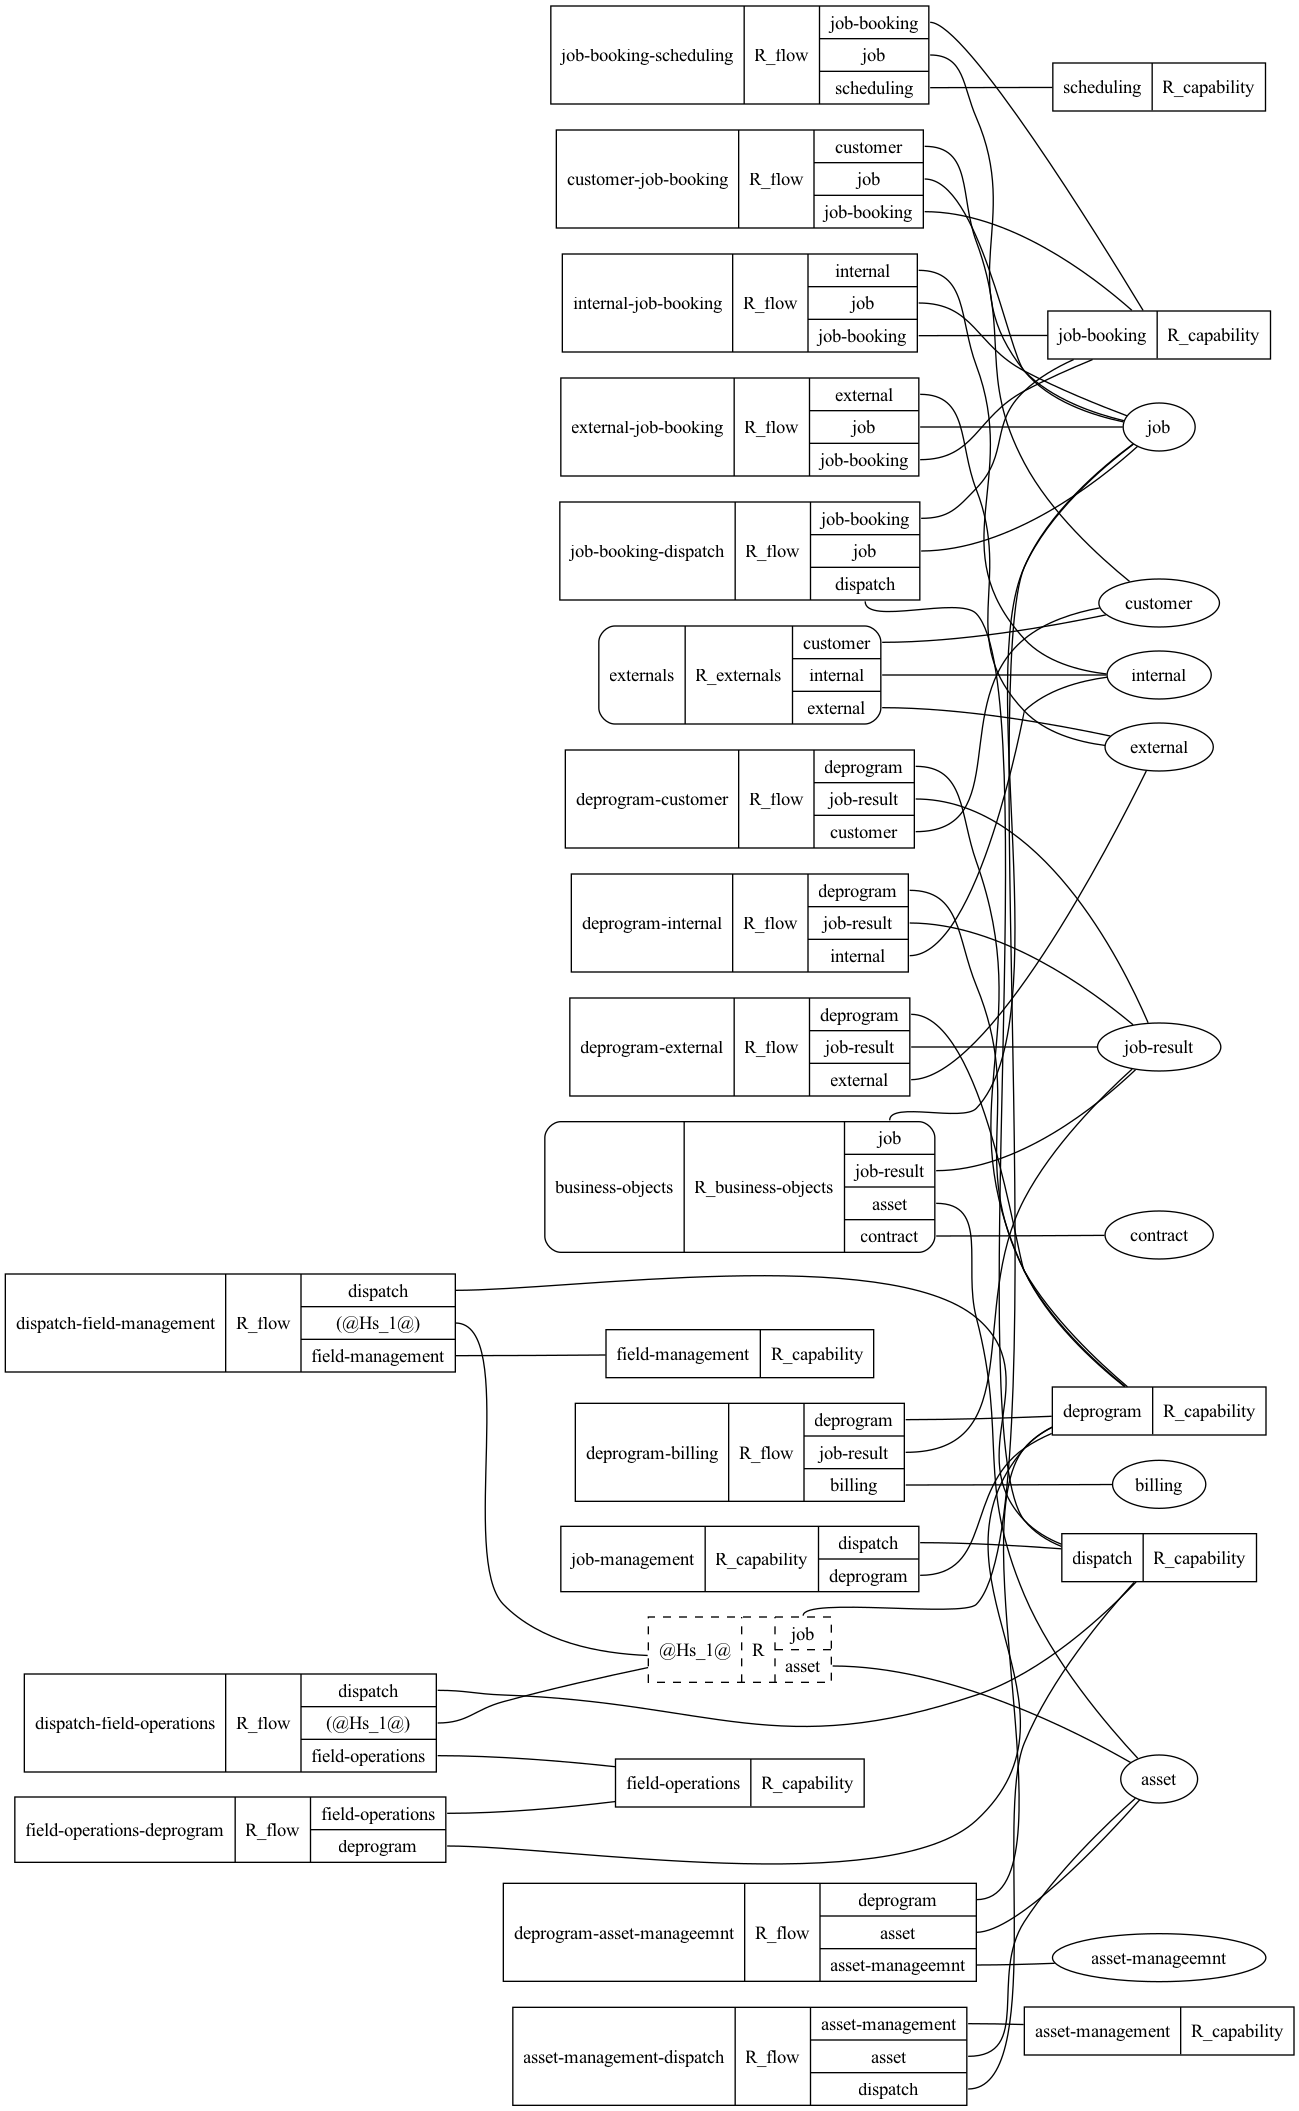

In [7]:
hn = Hypernetwork()

hn.copy(capabilities_hn)
hn.merge(business_objects_hn)
hn.merge(capability_flow_hn)

draw_hn(hn, fname=pictures_dir+"hn", view=False, show_hstype=False, direction="LR")
Image(filename=pictures_dir+"hn.png", width=1000, height=1200)

In [6]:
print(hn.hypernetwork["dispatch"])

dispatch=
